# Análise de Correlação

In [ ]:
# Importando os módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy as sp
%matplotlib inline

In [2]:
sns.__version__

'0.9.0'

### Primeiro dataset

In [3]:
matplotlib.__version__

'3.0.3'

In [4]:
# Carregando o dataset
casas = pd.read_csv('Casas.csv')
casas.head()

,id,Valor,Tamanho,Lote,Banheiros,Quartos,BQ,Ano,Tempo,Tempo_Quad,Garagem_Tamanho,Status,D7,escola,D8,D9,D10,D11,D12
0,1,388.0,2.180,4,3.0,4,12.0,1940,-3.0,9.00,0,sld,0,edison,1,0,0,0,0
1,2,450.0,2.054,5,3.0,4,12.0,1957,-1.3,1.69,2,sld,0,edison,1,0,0,0,0
2,3,386.0,2.112,5,2.0,4,8.0,1955,-1.5,2.25,2,sld,0,edison,1,0,0,0,0
3,4,350.0,1.442,6,1.0,2,2.0,1956,-1.4,1.96,1,act,1,adams,0,0,1,0,0
4,5,155.5,1.800,1,2.0,4,8.0,1994,2.4,5.76,1,sld,0,adams,0,0,1,0,0


In [5]:
# Verificando o número de observações e de variáveis
casas.shape

(76, 19)

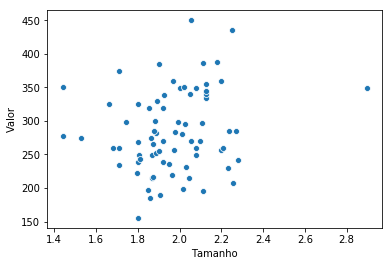

In [6]:
# Scatterplot
sns.scatterplot(x=casas['Tamanho'], y=casas['Valor'])

In [7]:
# Verificando o coeficiente de correlação
np.corrcoef(casas['Tamanho'], casas['Valor'])

array([[1.        , 0.20143783],
       [0.20143783, 1.        ]])

### Segundo dataset

In [8]:
# Carregando o dataset
casas = pd.read_csv('houseprices.csv')
casas.head()

,Valor,Area,Banheiros,Quartos,TamanhoLote,Tempo,Lareira
0,142212,1982,1.0,3,2.00,133,0
1,134865,1676,1.5,3,0.38,14,1
2,118007,1694,2.0,3,0.96,15,1
3,138297,1800,1.0,2,0.48,49,1
4,129470,2088,1.0,3,1.84,29,1


In [9]:
# Verificando o número de observações e variáveis
casas.shape

(1047, 7)

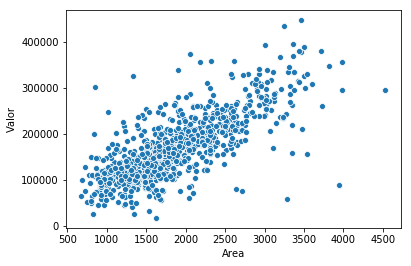

In [10]:
# Scatterplot - relação entre as variáveis "area" e "valor" 
sns.scatterplot(casas['Area'], casas['Valor'])

In [11]:
# Coeficiente de correlação e valor-p
sp.stats.pearsonr(casas['Area'], casas['Valor'])

(0.7763964501037224, 9.752932228310927e-212)

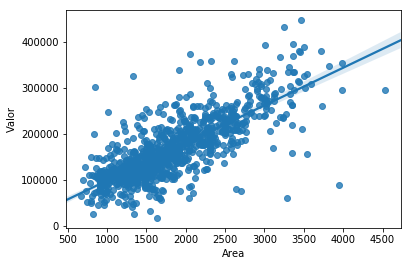

In [12]:
# Gráfico com linha de regressão e intervalo de confiança
sns.regplot(x=casas['Area'], y=casas['Valor'], data=casas)

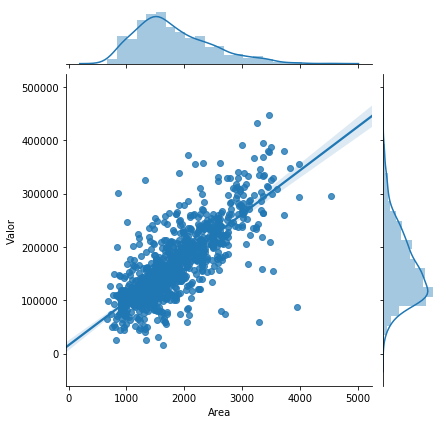

In [13]:
# Gráfico com as distribuições das variáveis "area" e "valor" 
sns.jointplot(casas['Area'], casas['Valor'], kind='reg')

In [14]:
# Matriz de correlação dos atributos do dataset
casas.corr()

,Valor,Area,Banheiros,Quartos,TamanhoLote,Tempo,Lareira
Valor,1.000000,0.776396,0.670189,0.471074,0.155284,-0.363354,0.460237
Area,0.776396,1.000000,0.722649,0.664347,0.200180,-0.263168,0.481436
Banheiros,0.670189,0.722649,1.000000,0.491798,0.100993,-0.443830,0.444700
Quartos,0.471074,0.664347,0.491798,1.000000,0.140682,-0.060598,0.295873
TamanhoLote,0.155284,0.200180,0.100993,0.140682,1.000000,0.015135,0.052765
Tempo,-0.363354,-0.263168,-0.443830,-0.060598,0.015135,1.000000,-0.248794
Lareira,0.460237,0.481436,0.444700,0.295873,0.052765,-0.248794,1.000000


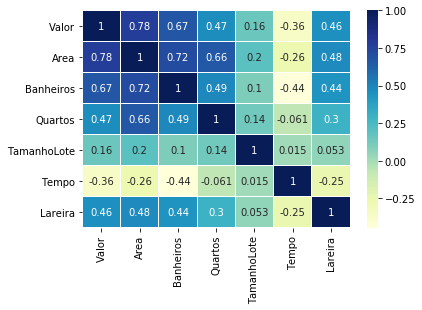

In [15]:
# Mapa de calor identificando as correlações entre as variáveis
sns.heatmap(casas.corr(), cmap ="YlGnBu", linewidths = 0.1, annot=True) 

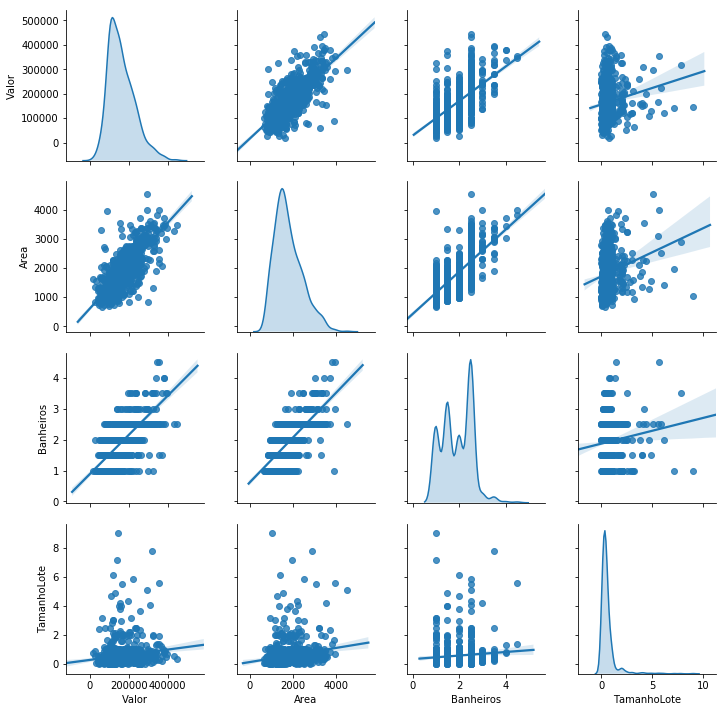

In [16]:
# Coleção de gráficos indicando distribuições e correlações
sns.pairplot(casas[['Valor','Area','Banheiros','TamanhoLote']], kind='reg', diag_kind='kde')

In [17]:
# Contagem de casas pela variável "quartos"
casas['Quartos'].value_counts()

3    522
4    321
2    176
5     22
6      3
1      3
Name: Quartos, dtype: int64

In [18]:
# Média de valores de acordo com os quartos
casas.groupby('Quartos')['Valor'].mean()

Quartos
1     73555.333333
2    120312.602273
3    149917.019157
4    206800.227414
5    221827.772727
6    216064.333333
Name: Valor, dtype: float64

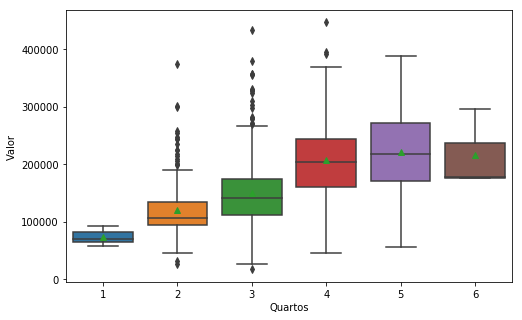

In [19]:
# Análise da relação entre variável categórica e quantitativa (quartos e valores)
plt.figure(figsize=(8,5))
sns.boxplot(x=casas['Quartos'], y=casas['Valor'], showmeans=True)

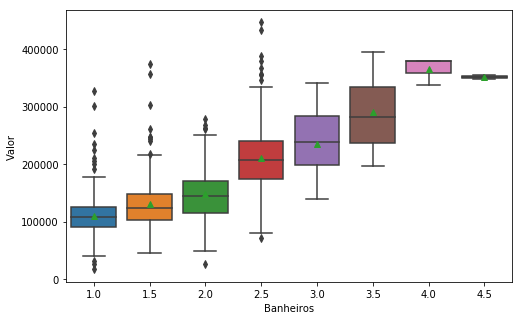

In [20]:
# Análise da relação entre variável categórica e quantitativa (banheiros e valores)
plt.figure(figsize=(8,5))
sns.boxplot(x=casas['Banheiros'], y=casas['Valor'], showmeans=True)